In [1]:
!pip install yellowbrick

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")

pal = ["#f08080","#ffdead", "#87cefa","#66cdaa"]
colours = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108'];

axtitle_dict = {'family': 'serif','color':  '#010D36','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

In [21]:
df= pd.read_csv('CustomerBehav_Tourism.csv')
df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0         0.0                                     8.0  
1         1.0                                    10.0  
2         0.0                                     7.0  
3         0.0                                     8.0  
4         1.0                                     6.0

In [22]:
df.info()
print('\tThe dataset contains ', df.shape[0],' rows and ',df.shape[1],' columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [23]:
#LÀM SẠCH DỮ LIỆU
columns_to_drop = ['Taken_product','total_likes_on_outofstation_checkin_received','Yearly_avg_view_on_travel_page', 'following_company_page', 'travelling_network_rating', 'montly_avg_comment_on_company_page','preferred_device']
df = df.drop(columns=columns_to_drop)

In [24]:
#Kiểm tra số lượng dữ liệu null
df.isnull().sum()

UserID                                       0
total_likes_on_outstation_checkin_given    381
yearly_avg_Outstation_checkins              75
member_in_family                             0
preferred_location_type                     31
Yearly_avg_comment_on_travel_page          206
week_since_last_outstation_checkin           0
working_flag                                 0
Adult_flag                                   1
Daily_Avg_mins_spend_on_traveling_page       1
dtype: int64

In [25]:
#Tạo list gồm các cột có type là object
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )
#Hiện thị các dữ liệu có trong từng cột object
for col in cat_columns:
    print('Value counts for column: ',col)
    print(df[col].unique())
    print()

Value counts for column:  yearly_avg_Outstation_checkins
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Value counts for column:  member_in_family
['2' '1' '4' 'Three' '3' '5' '10']

Value counts for column:  preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column:  working_flag
['No' 'Yes' '0']



In [26]:
#Chuẩn hóa dữ liệu của cột yearly_avg_Outstation_checkins
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')
#Thay * thành nan (trống)
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [27]:
#Chuẩn hóa dữ liệu cột member_in_family
df['member_in_family']= df['member_in_family'].replace('Three',3)
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

array([ 2,  1,  4,  3,  5, 10], dtype=int8)

In [28]:
#Chuyển đổi giá trị working_flag thành 0 1
df['working_flag'] = df['working_flag'].replace({'0':0,'No': 0, 'Yes': 1})
df['working_flag'].unique()

array([0, 1], dtype=int64)

In [29]:
#Kiểm tra nếu có dữ liệu < 0
num_columns = df.select_dtypes(exclude=['object']).drop(columns=['UserID'])
negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

Columns with negative values:
Index([], dtype='object')


In [30]:
#SỬ LÝ MISSING VALUE
#Trước khi thêm dữ liệu vào missing values
df.isnull().sum()

UserID                                       0
total_likes_on_outstation_checkin_given    381
yearly_avg_Outstation_checkins              76
member_in_family                             0
preferred_location_type                     31
Yearly_avg_comment_on_travel_page          206
week_since_last_outstation_checkin           0
working_flag                                 0
Adult_flag                                   1
Daily_Avg_mins_spend_on_traveling_page       1
dtype: int64

In [31]:
#Xóa giá trị null trong 3 thuộc tính này
cat_columns = ['preferred_location_type', 'working_flag', 'Adult_flag']
df = df.dropna(subset=cat_columns)
print('\tThe dataset contains ', df.shape[0],' rows')

	The dataset contains  11728  rows


In [32]:
#Chuyển Null ở cột dạng int và float thành dữ liệu trung vị
num_columns = ['total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'Daily_Avg_mins_spend_on_traveling_page']
for i in num_columns:
    median_value = df[i].median()
    df[i].fillna(median_value, inplace=True)

In [33]:
#Sau khi thêm dữ liệu vào missing values
df.isnull().sum()

UserID                                     0
total_likes_on_outstation_checkin_given    0
yearly_avg_Outstation_checkins             0
member_in_family                           0
preferred_location_type                    0
Yearly_avg_comment_on_travel_page          0
week_since_last_outstation_checkin         0
working_flag                               0
Adult_flag                                 0
Daily_Avg_mins_spend_on_traveling_page     0
dtype: int64

In [34]:
#Xem dữ liệu bị trùng
df.duplicated().sum()

0

In [35]:
# Gộp 'Hill Stations' và 'Trekking' thành 'Inland'
df['preferred_location_type'] = df['preferred_location_type'].replace({'Hill Stations': 'Inland', 'Trekking': 'Inland'})

#Gộp 'Historical site', 'Tour and Travel','Big Cities' => 'Tour Travel'
df['preferred_location_type'] = df['preferred_location_type'].replace({'Historical site': 'Tour Travel', 'Tour and Travel': 'Tour Travel','Big Cities': 'Tour Travel','Tour  Travel': 'Tour Travel'})

#Gộp 'Social Media','Game','Movie','OTT' => 'Entertainment'
df['preferred_location_type'] = df['preferred_location_type'].replace({'Social media': 'Entertainment', 'Game': 'Entertainment', 'Movie': 'Entertainment', 'OTT': 'Entertainment'})

#'Other' => 'Financial' vì Other có thể phù hợp với các tour có ít chi phí
df['preferred_location_type'] = df['preferred_location_type'].replace('Other', 'Financial')

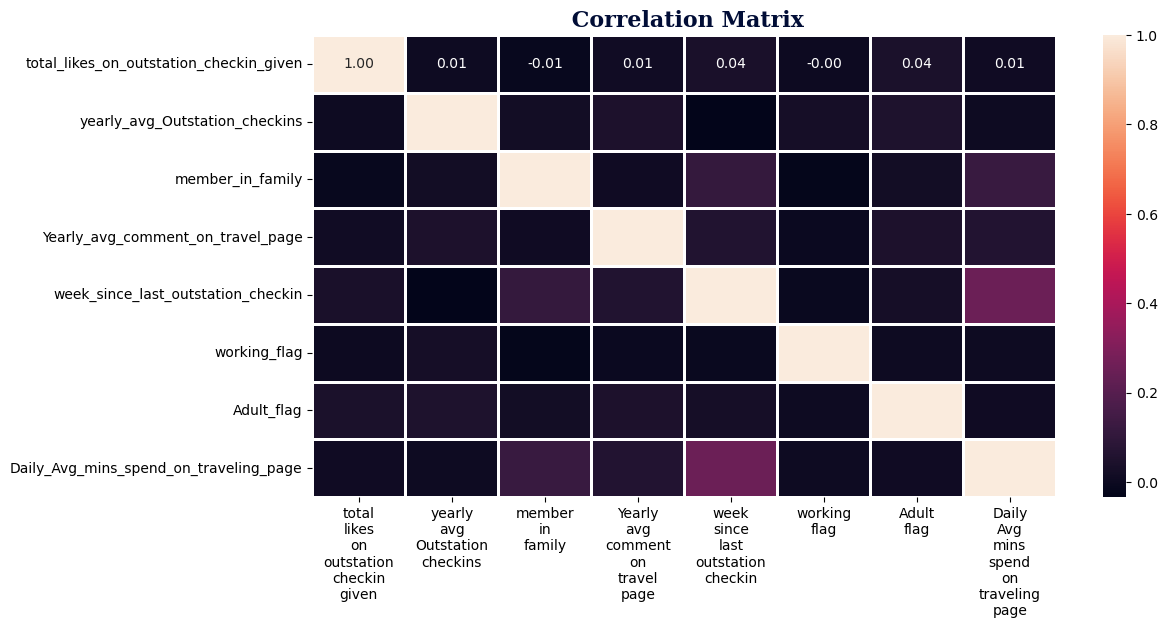

In [36]:
#Correlation heatmap: Tương quan giữa các thuộc tính
num_columns = df.select_dtypes(exclude=['object']).columns.drop('UserID')
corr = df[num_columns].corr(method='pearson')
fig = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.9)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title(' Correlation Matrix', fontdict=axtitle_dict)
plt.show()

In [37]:
#Chuyển cột sau thành dữ liệu object
df[['Adult_flag','working_flag']]= df[['Adult_flag','working_flag']].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11728 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   UserID                                   11728 non-null  int64  
 1   total_likes_on_outstation_checkin_given  11728 non-null  float64
 2   yearly_avg_Outstation_checkins           11728 non-null  float64
 3   member_in_family                         11728 non-null  int8   
 4   preferred_location_type                  11728 non-null  object 
 5   Yearly_avg_comment_on_travel_page        11728 non-null  float64
 6   week_since_last_outstation_checkin       11728 non-null  int64  
 7   working_flag                             11728 non-null  object 
 8   Adult_flag                               11728 non-null  object 
 9   Daily_Avg_mins_spend_on_traveling_page   11728 non-null  float64
dtypes: float64(4), int64(2), int8(1), object(3)
memory 

In [38]:
#Thống kê dữ liệu dạng int và float
df.describe().T

count          mean           std  \
UserID                                   11728.0  1.005892e+06   3391.258788   
total_likes_on_outstation_checkin_given  11728.0  2.816983e+04  14149.758209   
yearly_avg_Outstation_checkins           11728.0  8.196965e+00      8.650363   
member_in_family                         11728.0  2.920617e+00      1.045445   
Yearly_avg_comment_on_travel_page        11728.0  7.480696e+01     23.822875   
week_since_last_outstation_checkin       11728.0  3.202422e+00      2.615254   
Daily_Avg_mins_spend_on_traveling_page   11728.0  1.382239e+01      9.073875   

                                               min         25%        50%  \
UserID                                   1000001.0  1002958.75  1005896.5   
total_likes_on_outstation_checkin_given     3570.0    16695.00    28080.0   
yearly_avg_Outstation_checkins                 1.0        1.00        4.0   
member_in_family                               1.0        2.00        3.0   
Yearly_avg_comment_on_travel_page              3.0       57.00       75.0   
week_since_last_outstation_checkin             0.0        1.00        3.0   
Daily_Avg_mins_spend_on_traveling_page         0.0        8.00       12.0   

                                                75%        max  
UserID                                   1008828.25  1011760.0  
total_likes_on_outstation_checkin_given    40113.50   252430.0  
yearly_avg_Outstation_checkins                14.00       29.0  
member_in_family                               4.00       10.0  
Yearly_avg_comment_on_travel_page             92.00      815.0  
week_since_last_outstation_checkin             5.00       11.0  
Daily_Avg_mins_spend_on_traveling_page        18.00      270.0

In [39]:
#Thống kê dữ liệu dạng object: preferred_location_type, Adult_flag
df.select_dtypes(include = ['object']).describe().T

count unique        top    freq
preferred_location_type    11728      6  Financial    3051
working_flag               11728      2          0    9923
Adult_flag               11728.0    4.0        0.0  5039.0

Distribution of preferred_location_type
----------------------------------------------------------------


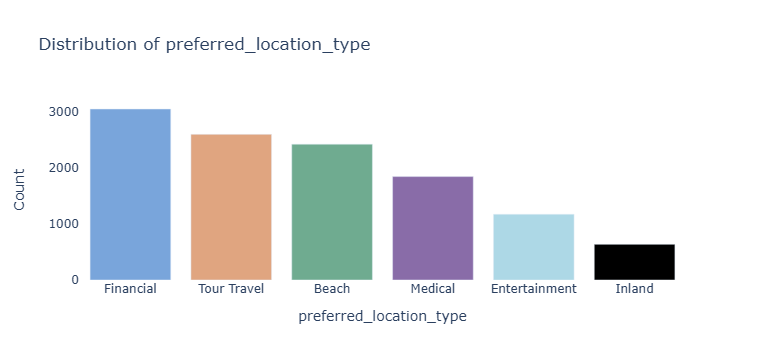

Distribution of working_flag
----------------------------------------------------------------


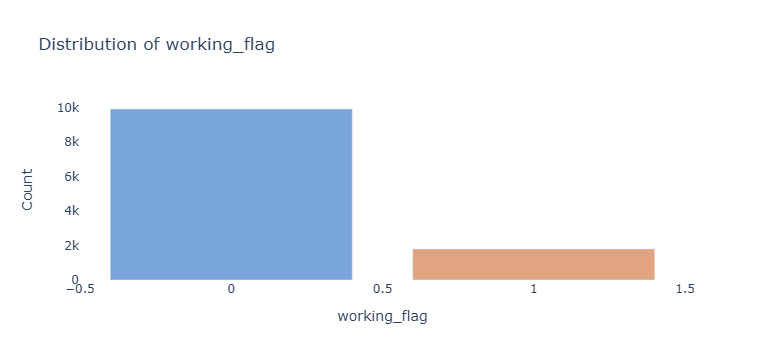

Distribution of Adult_flag
----------------------------------------------------------------


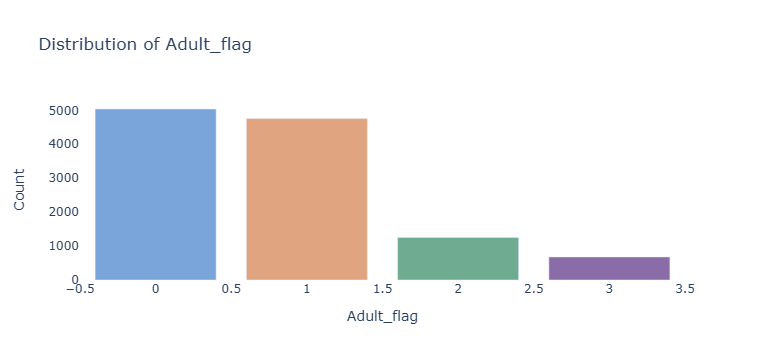

In [40]:
#TRỰC QUAN HÓA DỮ LIỆU
cat_colums = df.select_dtypes(include = ['object'])
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_colums[cols].value_counts()
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
for x in cat_colums:
    univariateAnalysis_category(x)

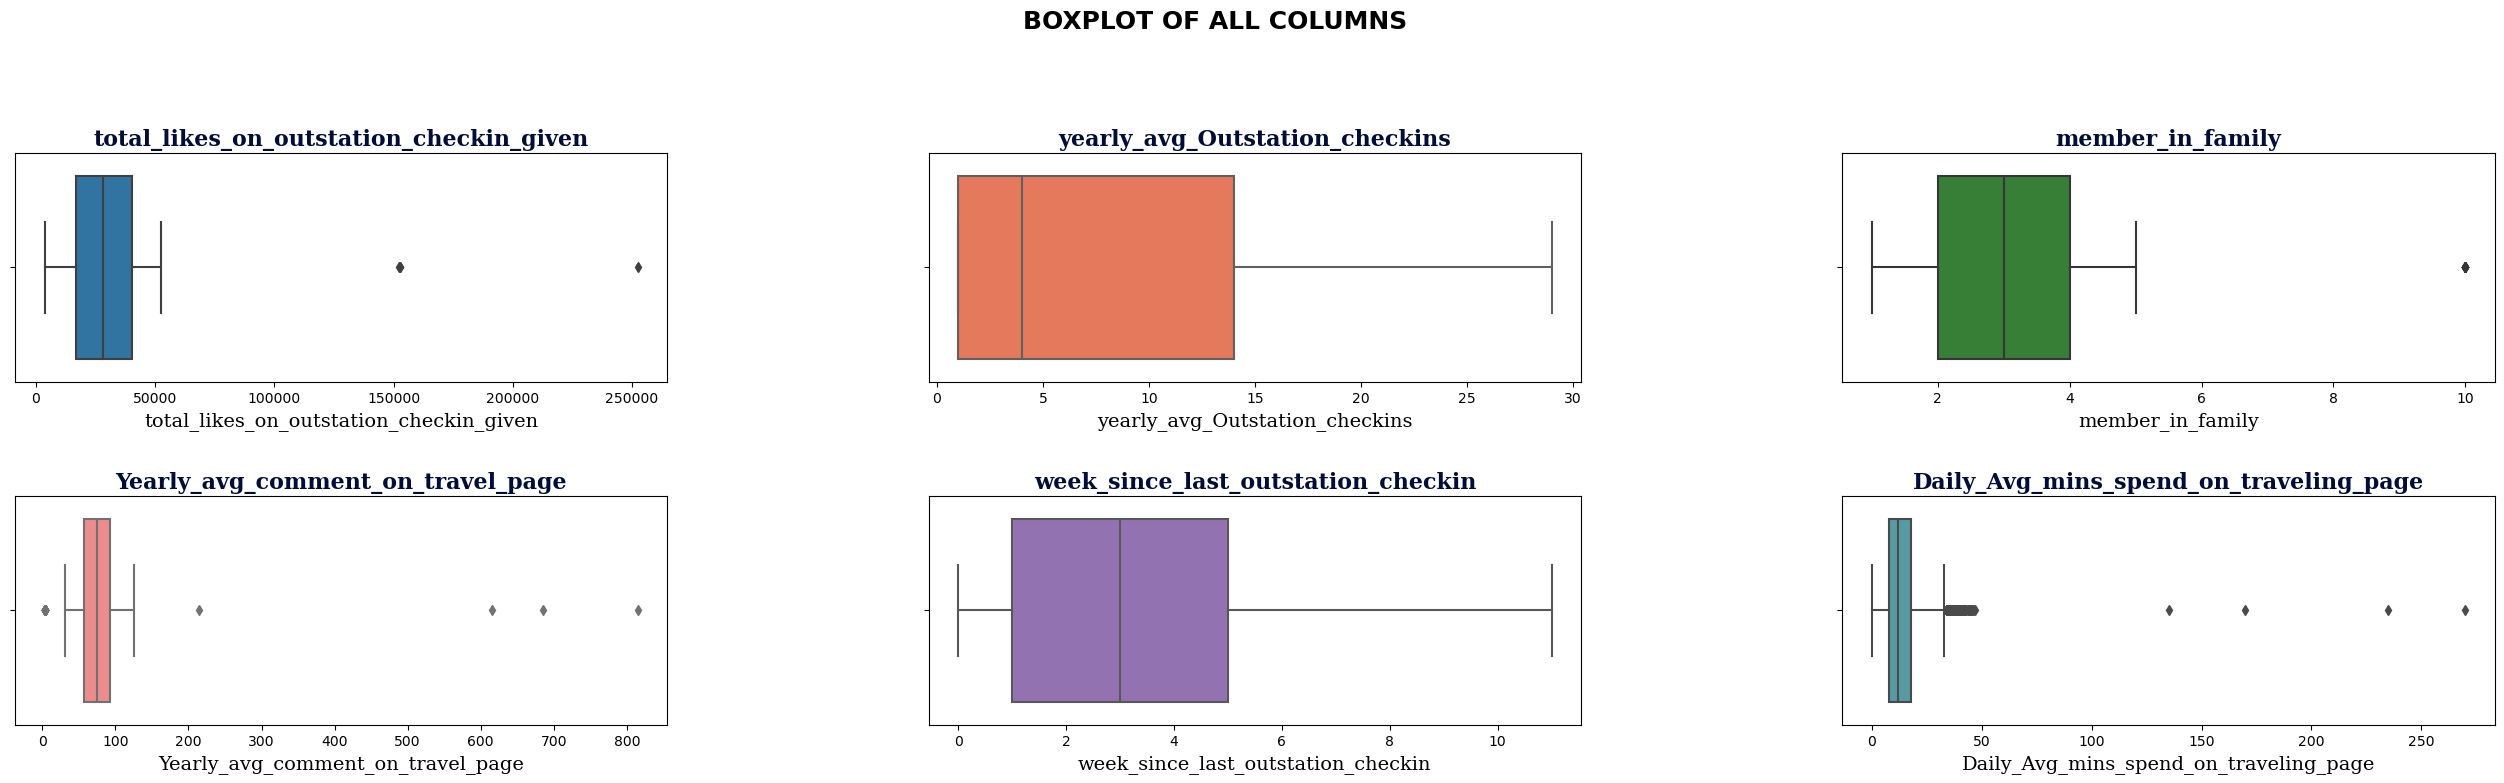

In [41]:
#XỬ LÝ OUTLIERS CỦA DỮ LIỆU
#Outliers của cột dữ liệu
num_columns = df.select_dtypes(exclude=['object']).columns.drop(['UserID'])
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

In [42]:
#Kiểm tra số lượng quan sát vượt quá Upper & Lower Limit
Q5 = df[num_columns].quantile(0.05)
Q95 = df[num_columns].quantile(0.95)
UL = Q95
LL = Q5
outliers = ((df[num_columns] > UL) | (df[num_columns] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


total_likes_on_outstation_checkin_given    1174
yearly_avg_Outstation_checkins              490
member_in_family                            393
Yearly_avg_comment_on_travel_page          1120
week_since_last_outstation_checkin          198
Daily_Avg_mins_spend_on_traveling_page     1038
dtype: int64

In [43]:
#Hàm trả về giới hạn từ giá trị thứ 5 (Lower Limit) đến thứ 95 (Upper Limit)
def treat_outlier(col):
    q5  , q95 = np.percentile(col, [5, 95])
    return q5, q95
#Thay đổi các outlier trong dữ liệu
for i in num_columns:
    LR, UR  = treat_outlier(df[i])
    #Nếu dữ liệu lớn hơn Upper Limit thì thay bằng giá trị thứ 95
    df[i] = np.where(df[i] > UR, UR, df[i])
    #Nếu dữ liệu nhỏ hơn Lower Limit thì thay bằng giá trị thứ 5
    df[i] = np.where(df[i] < LR, LR, df[i])

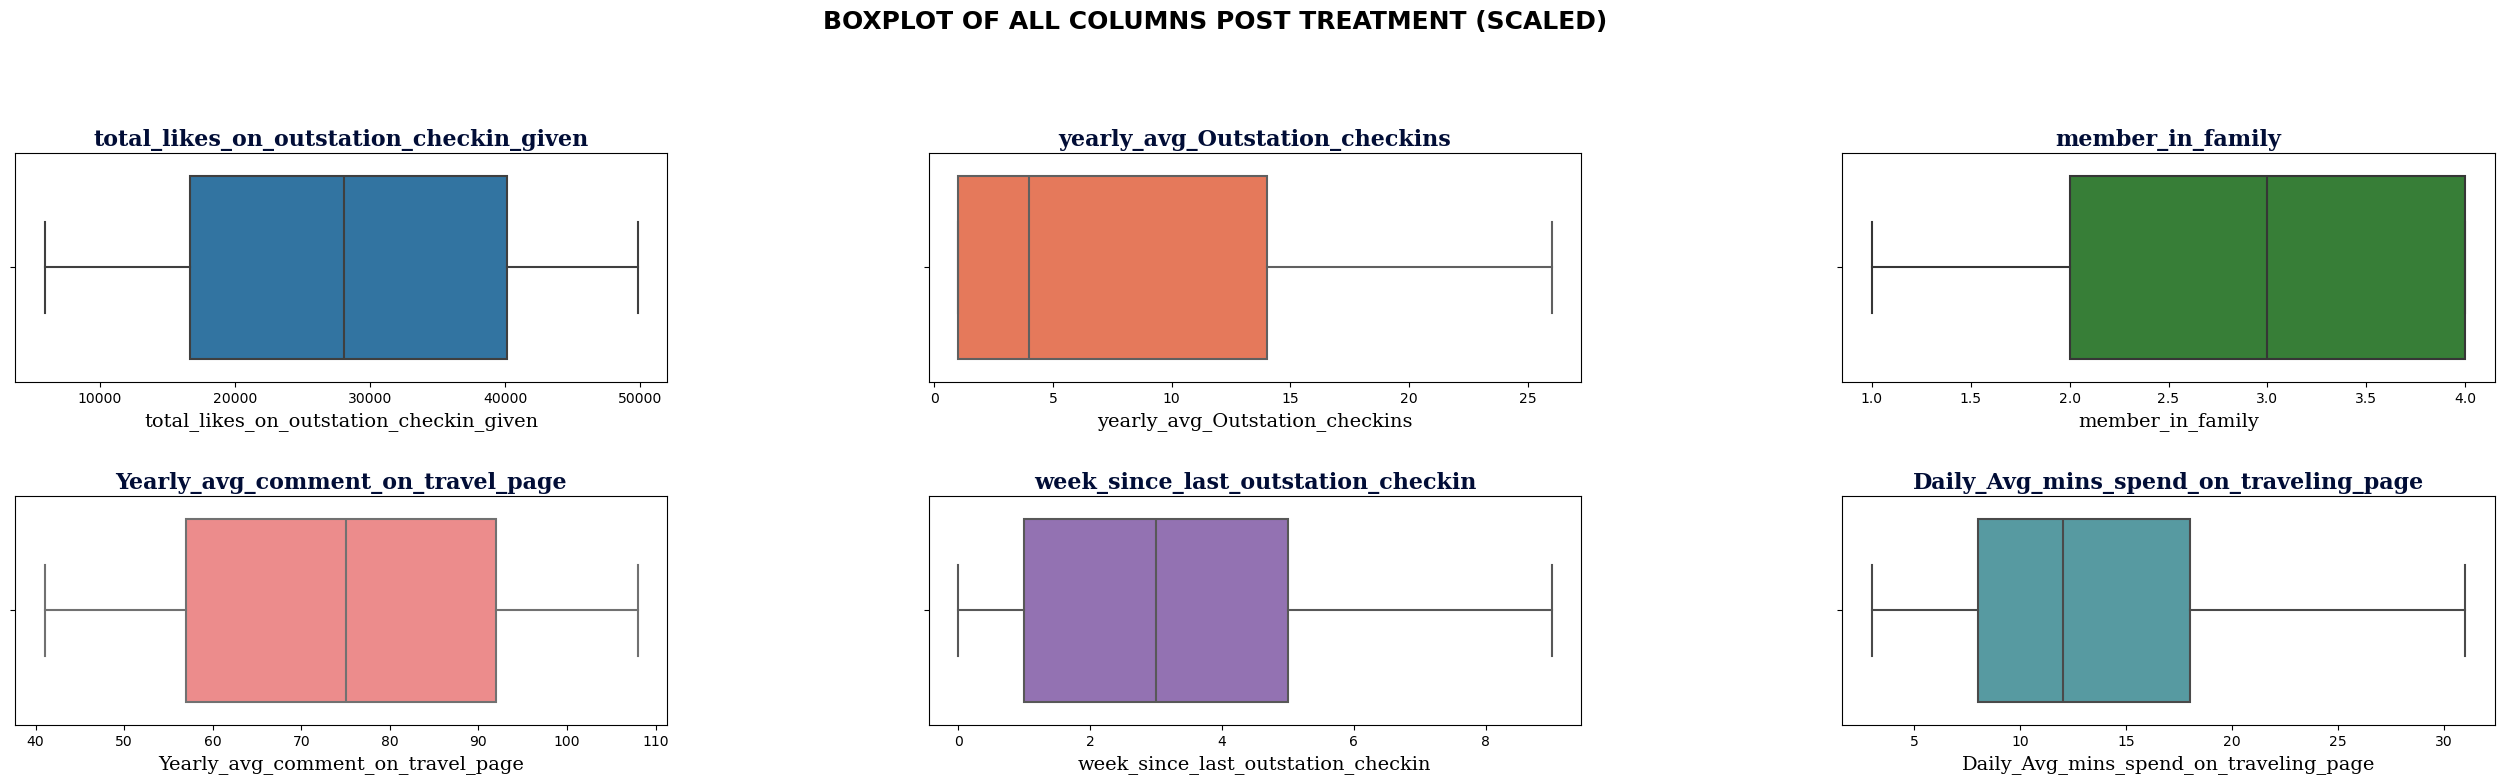

In [44]:
#Outliers của cột dữ liệu sau khi Loại bỏ Outlier
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS POST TREATMENT (SCALED)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

In [45]:
#Chuẩn bị dữ liệu để phân cụm
#Copy DataFrame gốc sang DataFrame mới
df_encoded = df.copy()
df_cluster = df.copy()

In [46]:
#Chuyển đổi giá trị cột preferred_location_type ở DataFrame df_encoded
df_encoded['preferred_location_type'] = df_encoded['preferred_location_type'].replace({'Financial':0,'Tour Travel':1,'Beach':2,'Medical':3,'Entertainment':4,'Inland':5})

In [47]:
#Định dạng dữ liệu object thành int
s = df.select_dtypes(exclude=['int'])
Flo_Obj_cols = list(s.columns)
for i in Flo_Obj_cols:
    df_encoded[i]=pd.to_numeric(df_encoded[i], errors="coerce")

In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11728 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   UserID                                   11728 non-null  int64  
 1   total_likes_on_outstation_checkin_given  11728 non-null  float64
 2   yearly_avg_Outstation_checkins           11728 non-null  float64
 3   member_in_family                         11728 non-null  float64
 4   preferred_location_type                  11728 non-null  int64  
 5   Yearly_avg_comment_on_travel_page        11728 non-null  float64
 6   week_since_last_outstation_checkin       11728 non-null  float64
 7   working_flag                             11728 non-null  int64  
 8   Adult_flag                               11728 non-null  float64
 9   Daily_Avg_mins_spend_on_traveling_page   11728 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1007.9 KB


In [64]:
# Phân khúc dựa trên nhân khẩu học => Thông tin cơ bản về khách hàng
cluster_columns = [
    'Daily_Avg_mins_spend_on_traveling_page',
    'Adult_flag',
    'yearly_avg_Outstation_checkins',
    'preferred_location_type'
]
#DataFrame mới hoàn chỉnh với 4 cột thuộc tính để tiến hành Phân khúc
df_encoded[cluster_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11728 entries, 0 to 11759
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Daily_Avg_mins_spend_on_traveling_page  11728 non-null  float64
 1   Adult_flag                              11728 non-null  float64
 2   yearly_avg_Outstation_checkins          11728 non-null  float64
 3   preferred_location_type                 11728 non-null  float64
dtypes: float64(4)
memory usage: 458.1 KB


In [65]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_encoded[cluster_columns] = scaler.fit_transform(df_encoded[cluster_columns])

In [66]:
#Dimensionality reduction with PCA: Giảm chiều tuyến tính 
#Linear methods => PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_encoded[cluster_columns])
PCA_ds = pd.DataFrame(pca.transform(df_encoded[cluster_columns]), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  11728.0  1.938725e-17  1.025866 -1.809091 -0.796681 -0.113896  0.642729   
col2  11728.0 -3.392769e-17  1.000626 -2.556096 -0.632756  0.005662  0.672164   
col3  11728.0  1.454044e-17  0.996334 -2.536040 -0.732489 -0.084885  0.668994   

           max  
col1  3.698367  
col2  2.607726  
col3  3.307253

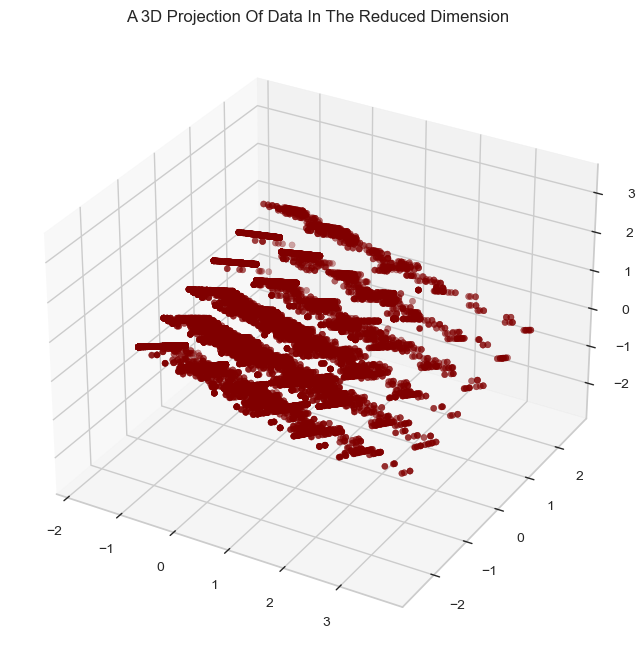

In [67]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title('A 3D Projection Of Data In The Reduced Dimension')
plt.show()

Elbow Method to determine the number of clusters to be formed:


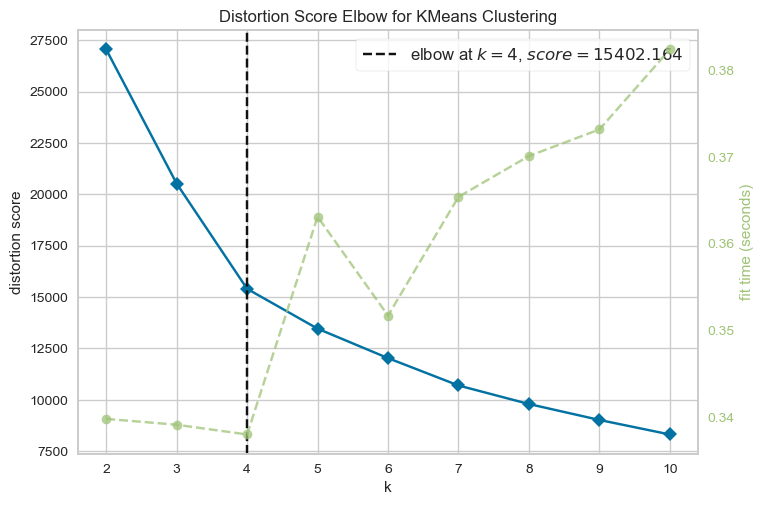

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
#Phương pháp Elbow để tìm ra số cluster (cụm) cần sử dụng
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [69]:
#Chọn ra được số cụm là 4
optimal_k = 4

#Sử dụng KMeans Clustering model
kmeans = KMeans(n_clusters=optimal_k,random_state=42)

#Tạo cột mới là Cluster đã được phân khúc
PCA_ds['Cluster'] = kmeans.fit_predict(df_encoded[cluster_columns])
df_cluster['Cluster'] = kmeans.fit_predict(df_encoded[cluster_columns])
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[cluster_columns])

#Chuyển cột Cluster sang dạng str
df_cluster['Cluster'] = df_cluster['Cluster'].astype(str)
df_encoded['Cluster'] = df_cluster['Cluster'].astype(str)

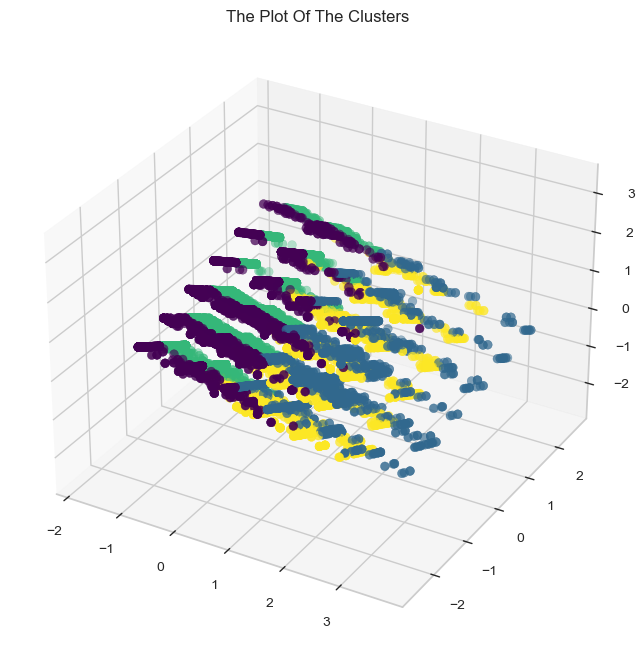

In [70]:
cmap = plt.cm.get_cmap('viridis')

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds['Cluster'], marker='o', cmap = cmap )
ax.set_title('The Plot Of The Clusters')
plt.show()

In [71]:
#Đánh giá mô hình Phân cụm bởi KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
davies_bouldin = davies_bouldin_score(df_encoded[cluster_columns], PCA_ds['Cluster'])
silhouette = silhouette_score(df_encoded[cluster_columns], PCA_ds['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_encoded[cluster_columns], PCA_ds['Cluster'])

print('Davies-Bouldin Index: ',davies_bouldin)
print('Silhouette Score: ',silhouette)
print('Calinski-Harabasz Index: ',calinski_harabasz)

Davies-Bouldin Index:  1.3047427480752591
Silhouette Score:  0.25650857297378976
Calinski-Harabasz Index:  3286.618657317663


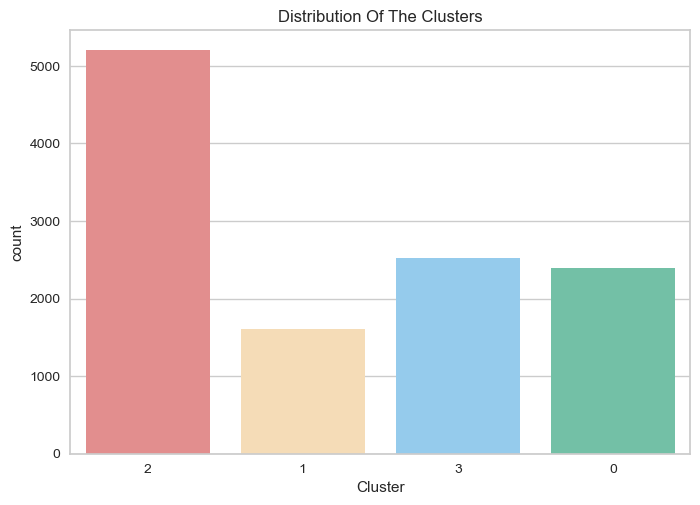

In [72]:
#Plotting countplot 
pl = sns.countplot(x=df_cluster['Cluster'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

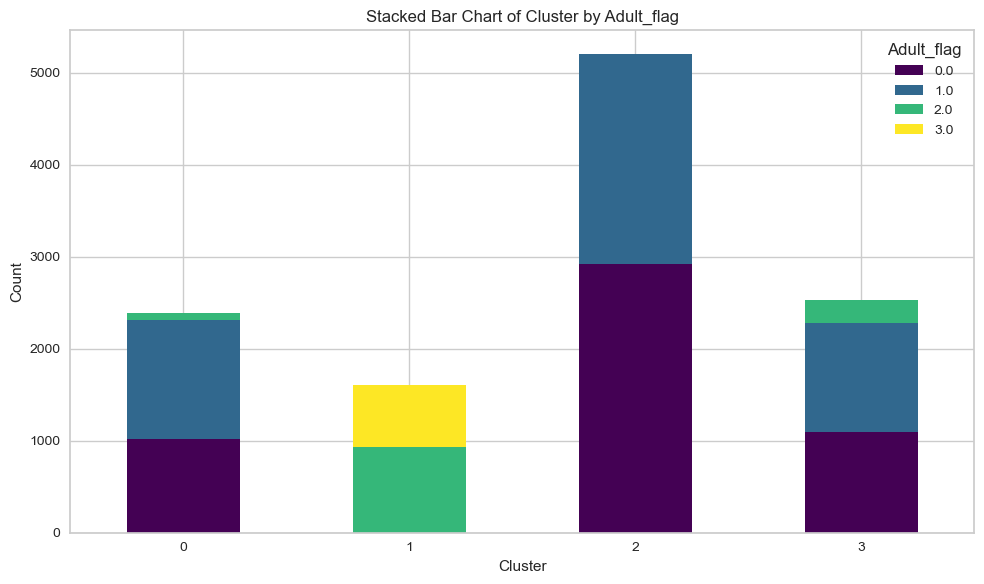

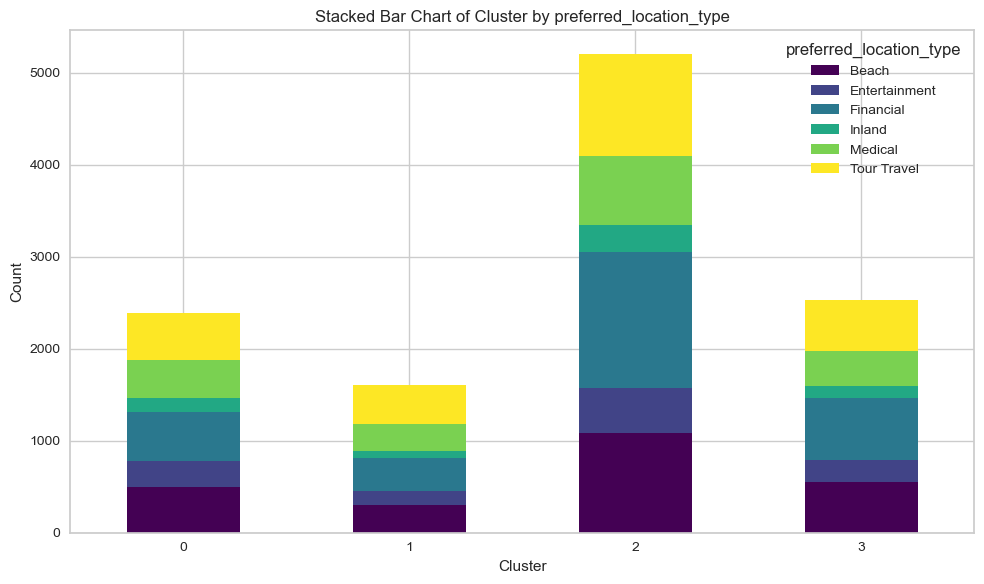

In [73]:
columns = ['Adult_flag','preferred_location_type']

for column in columns:
    data = df_cluster.groupby(['Cluster', column]).size().unstack().fillna(0)
    data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap = cmap)
    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout() 
    plt.show()

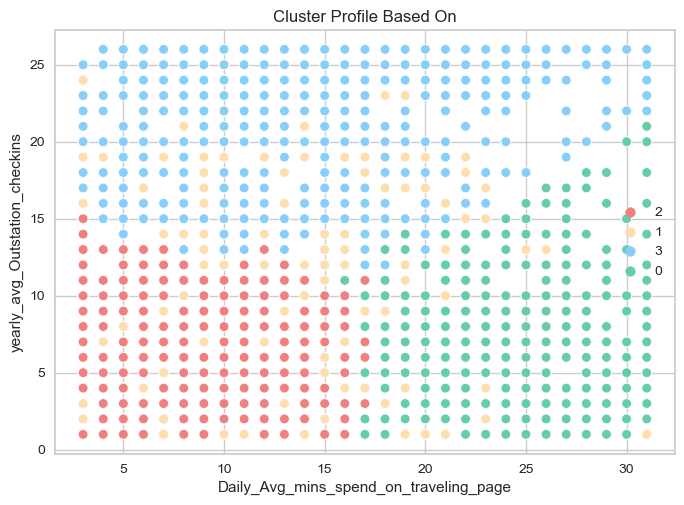

In [74]:
pl = sns.scatterplot(data = df_cluster,x=df_cluster['Daily_Avg_mins_spend_on_traveling_page'], y=df_cluster['yearly_avg_Outstation_checkins'],hue=df_cluster['Cluster'], palette= pal)
pl.set_title('Cluster Profile Based On')
plt.legend()
plt.show()

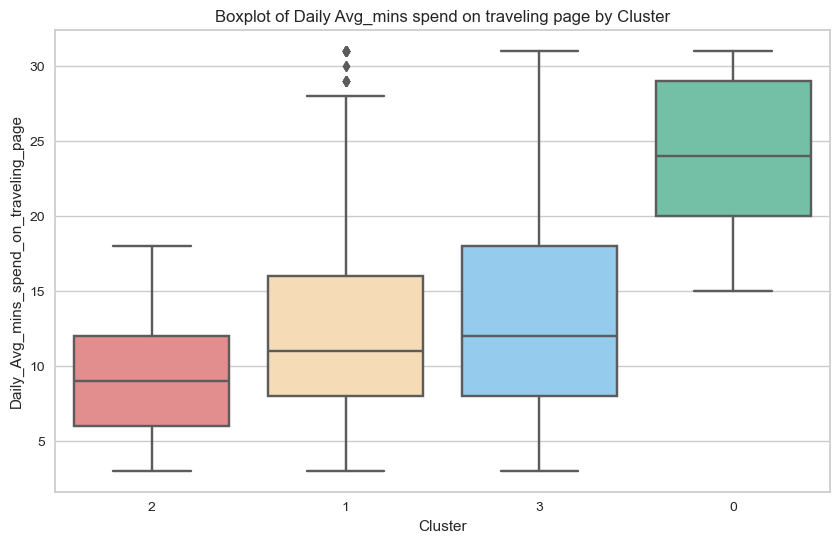

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=df_cluster['Daily_Avg_mins_spend_on_traveling_page'], data=df_cluster, palette=pal)  # Adjust palette as needed
plt.title(f'Boxplot of Daily Avg_mins spend on traveling page by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Daily_Avg_mins_spend_on_traveling_page')
plt.show()

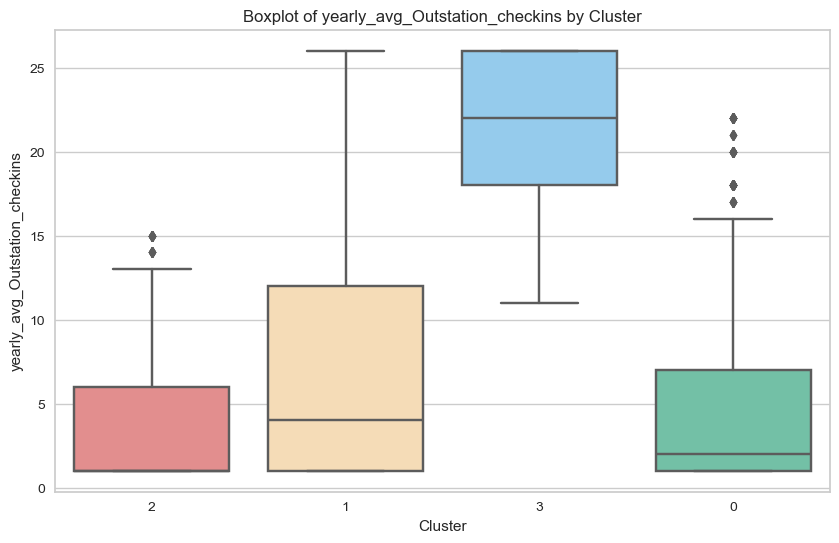

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=df_cluster['yearly_avg_Outstation_checkins'], data=df_cluster, palette=pal)  # Adjust palette as needed
plt.title(f'Boxplot of yearly_avg_Outstation_checkins by Cluster')
plt.xlabel('Cluster')
plt.ylabel('yearly_avg_Outstation_checkins')
plt.show()

In [77]:
#PHÂN KHÚC CLUSTER VÀ Ý NGHĨA DỰA TRÊN NHÂN KHẨU HỌC

#Cluster 0: Nhóm tuổi thanh niên có hứng thú nhưng chưa hành động
#Cluster 1: Nhóm tuổi trung niên trở lên có hứng thú và có số lần đi du lịch trung bình cao
#Cluster 2: Nhóm tuổi thanh niên có số lần đi du lịch thấp => Không có hứng thú
#Cluster 3: Nhóm khách hàng có số lần du lịch cao => Có hứng thú

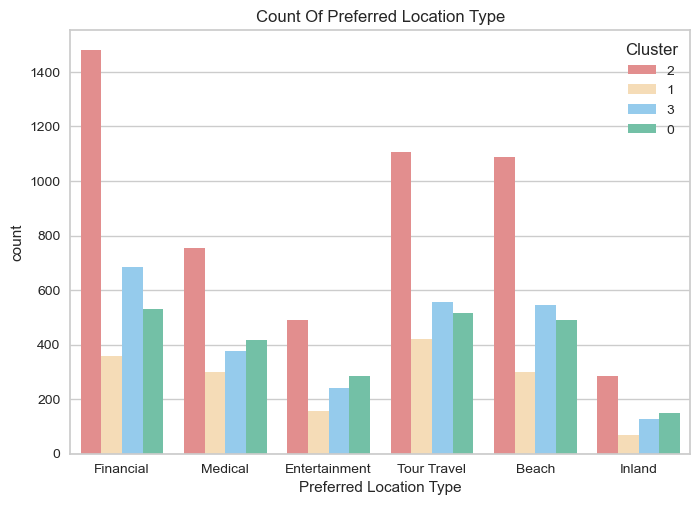

In [78]:
#Plotting count of Preferred Location Type
plt.figure()
pl = sns.countplot(x=df_cluster['preferred_location_type'],hue=df_cluster['Cluster'], palette= pal)
pl.set_title('Count Of Preferred Location Type')
pl.set_xlabel('Preferred Location Type')
plt.show()

In [46]:
new_customer = {
    'total_likes_on_outstation_checkin_given': 15000,
    'yearly_avg_Outstation_checkins': 28,
    'member_in_family': 3,
    'preferred_location_type': 'Beach',
    'Yearly_avg_comment_on_travel_page': 80,
    'week_since_last_outstation_checkin': 12,
    'working_flag': 1,
    'Adult_flag': 2,
    'Daily_Avg_mins_spend_on_traveling_page': 60
}

In [47]:
#Copy bộ dữ liệu đã được phân khúc vào DataFrame để train
train_data = df_encoded.copy()
train_data.drop(columns=['UserID'], inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11728 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   total_likes_on_outstation_checkin_given  11728 non-null  float64
 1   yearly_avg_Outstation_checkins           11728 non-null  float64
 2   member_in_family                         11728 non-null  float64
 3   preferred_location_type                  11728 non-null  float64
 4   Yearly_avg_comment_on_travel_page        11728 non-null  float64
 5   week_since_last_outstation_checkin       11728 non-null  float64
 6   working_flag                             11728 non-null  int64  
 7   Adult_flag                               11728 non-null  float64
 8   Daily_Avg_mins_spend_on_traveling_page   11728 non-null  float64
 9   Cluster                                  11728 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 10

In [48]:
# Chuyển dữ liệu khách hàng mới thành DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Mã hóa dữ liệu DataFrame mới
new_customer_df['preferred_location_type'] = new_customer_df['preferred_location_type'].replace({'Financial':0,'Tour Travel':1,'Beach':2,'Medical':3,'Entertainment':4,'Inland':5})
new_customer_df.head()

total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                    15000                              28   

   member_in_family  preferred_location_type  \
0                 3                        2   

   Yearly_avg_comment_on_travel_page  week_since_last_outstation_checkin  \
0                                 80                                  12   

   working_flag  Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0             1           2                                      60

In [50]:
new_customer_cluster = new_customer_df.copy()
new_customer_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   total_likes_on_outstation_checkin_given  1 non-null      int64
 1   yearly_avg_Outstation_checkins           1 non-null      int64
 2   member_in_family                         1 non-null      int64
 3   preferred_location_type                  1 non-null      int64
 4   Yearly_avg_comment_on_travel_page        1 non-null      int64
 5   week_since_last_outstation_checkin       1 non-null      int64
 6   working_flag                             1 non-null      int64
 7   Adult_flag                               1 non-null      int64
 8   Daily_Avg_mins_spend_on_traveling_page   1 non-null      int64
dtypes: int64(9)
memory usage: 204.0 bytes


In [51]:
# Tách dữ liệu thành tập huấn luyện và kiểm tra
X = train_data.drop(columns=['Cluster'])
Y = train_data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [52]:
# Sử dụng KNeighborsClassifier để phân loại
from sklearn.neighbors import KNeighborsClassifier
model_kNN = KNeighborsClassifier(n_neighbors=4)
model_kNN.fit(X_train, y_train)
customer_predicted_kNN = np.empty(1, dtype=int)
customer_predicted_kNN[0] = model_kNN.predict(new_customer_cluster)
print('Khách hàng mới thuộc phân khúc (kNN): Cluster', customer_predicted_kNN[0])

Khách hàng mới thuộc phân khúc (kNN): Cluster 1


In [59]:
print(customer_predicted_RF)

[3]


In [54]:
y_pred = model_kNN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       476
           1       0.64      0.73      0.68       338
           2       0.75      0.75      0.75      1034
           3       0.74      0.52      0.61       498

    accuracy                           0.70      2346
   macro avg       0.69      0.69      0.68      2346
weighted avg       0.71      0.70      0.70      2346



In [55]:
# Sử dụng RandomForestClassifier để phân loại
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(X_train, y_train)
customer_predicted_RF = np.empty(1, dtype=int)
customer_predicted_RF[0] = model_RF.predict(new_customer_cluster)
print('Khách hàng mới thuộc phân khúc (Random Forest): Cluster', customer_predicted_RF[0])

Khách hàng mới thuộc phân khúc (Random Forest): Cluster 3


In [56]:
y_pred = model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       1.00      1.00      1.00       338
           2       0.99      1.00      0.99      1034
           3       0.99      0.99      0.99       498

    accuracy                           0.99      2346
   macro avg       0.99      0.99      0.99      2346
weighted avg       0.99      0.99      0.99      2346



In [57]:
# Sử dụng DecisionTreeClassifier để phân loại
model_DT = DecisionTreeClassifier(random_state=0)
model_DT.fit(X_train, y_train)
customer_predicted_DT = np.empty(1, dtype=int)
customer_predicted_DT[0] = model_DT.predict(new_customer_cluster)
print('Khách hàng mới thuộc phân khúc (Decision Tree): Cluster', customer_predicted_DT[0])

Khách hàng mới thuộc phân khúc (Decision Tree): Cluster 3


In [58]:
y_pred = model_DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       1.00      1.00      1.00       338
           2       1.00      1.00      1.00      1034
           3       0.99      0.99      0.99       498

    accuracy                           0.99      2346
   macro avg       0.99      0.99      0.99      2346
weighted avg       0.99      0.99      0.99      2346



<Figure size 1200x600 with 0 Axes>

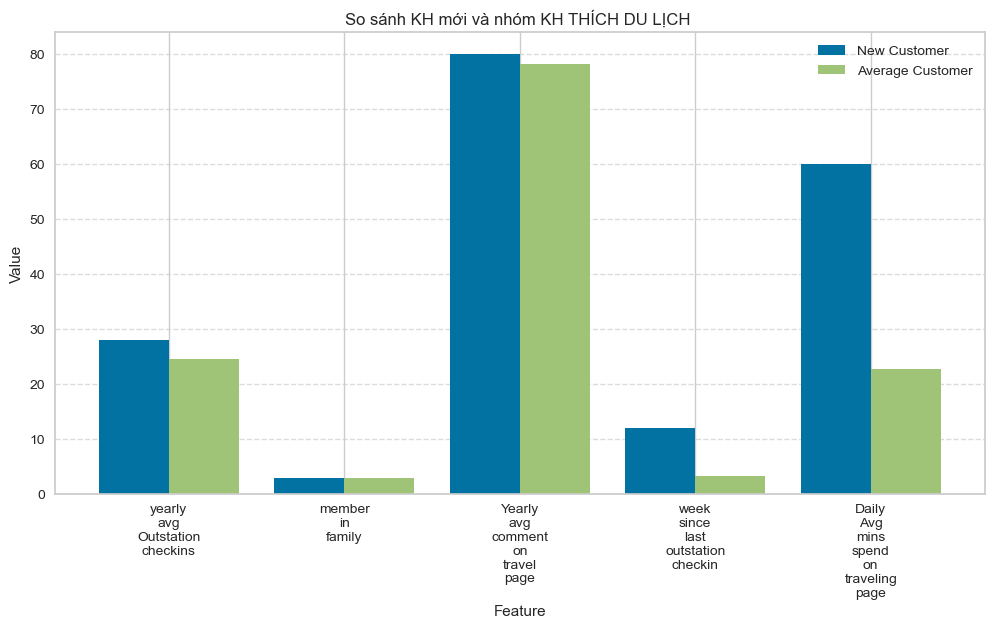

In [125]:
df_filtered = df[(df['yearly_avg_Outstation_checkins'] > 20) & (df['Daily_Avg_mins_spend_on_traveling_page'] > 15)]
num_columns = df_filtered.select_dtypes(exclude=['object']).drop(columns=['UserID','total_likes_on_outstation_checkin_given'])
df_filtered = num_columns.mean()
features = ['yearly_avg_Outstation_checkins',
            'member_in_family', 'Yearly_avg_comment_on_travel_page',
            'week_since_last_outstation_checkin', 'Daily_Avg_mins_spend_on_traveling_page']

new_customer_values = new_customer_df.iloc[0]
comparison_df = pd.DataFrame({
    'Feature': features,
    'New Customer': new_customer_values[features].values,
    'Average Customer': df_filtered[features].values
})
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
comparison_df.set_index('Feature').plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('So sánh KH mới và nhóm KH THÍCH DU LỊCH ')
plt.ylabel('Value')
xticks_labels = [label.get_text().replace('_', '\n') for label in plt.gca().get_xticklabels()]
plt.xticks(plt.xticks()[0], xticks_labels, rotation=0, horizontalalignment='center')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()